In [1]:
#!pip install seaborn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
# tmdb 영화 크롤링 csv파일 불러오기 
files = os.listdir('../data-files/')
files

['.DS_Store',
 'tmdbmovielist(1-6999).csv',
 'tmdbmovielist(10000-14999).csv',
 'tmdbmovielist(100000-149999).csv',
 'tmdbmovielist(15000-19999).csv',
 'tmdbmovielist(150000-199999).csv',
 'tmdbmovielist(20000-99999).csv',
 'tmdbmovielist(200000-209999).csv',
 'tmdbmovielist(210000-219999).csv',
 'tmdbmovielist(220000-229999).csv',
 'tmdbmovielist(230000-239999).csv',
 'tmdbmovielist(240000-249999).csv',
 'tmdbmovielist(250000-259999).csv',
 'tmdbmovielist(260000-269999).csv',
 'tmdbmovielist(270000-279999).csv',
 'tmdbmovielist(280000-289999).csv',
 'tmdbmovielist(290000-299999).csv',
 'tmdbmovielist(300000-349999).csv',
 'tmdbmovielist(350000-359999).csv',
 'tmdbmovielist(360000-369999).csv',
 'tmdbmovielist(370000-379999).csv',
 'tmdbmovielist(380000-389999).csv',
 'tmdbmovielist(390000-399999).csv',
 'tmdbmovielist(400000-409999).csv',
 'tmdbmovielist(410000-419999).csv',
 'tmdbmovielist(420000-429999).csv',
 'tmdbmovielist(430000-439999).csv',
 'tmdbmovielist(440000-449999).csv',


In [3]:
# csv파일 DB(mysql)에 저장  ->   510,392개 데이터

import pymysql

# 1. connect
conn = pymysql.connect(host="127.0.0.1", port=3306, db='finalteam3', user="kdigital", password="mysql", charset="utf8")

# 2. get command object
cursor = conn.cursor()

cursor.execute("delete from movie") #기존 데이터를 지울 때 주석을 풀어주세요 

error_list = []
movie3 = []
for file in files:
    # if file.find('tmdbmovielist') == 0 and file.find('100000-149999') == -1 and file.find('20000-99999') == -1:
    if file.find('tmdbmovielist') == 0:
        print(file)
        try:
            try :
                movies = pd.read_csv('../data-files/{0}'.format(file), encoding="utf-8")
            except:
                movies = pd.read_csv('../data-files/{0}'.format(file), encoding="utf-8", lineterminator='\n')

            movies.drop(movies.columns[0], axis=1, inplace=True)

            movies2 = movies[movies['status_message'].isna()] # # "The resource you requested could not be found.,,,,,,,,,,,,,,,,,,,,,,,,," 를 포함한 행 제거

            movies2 = movies2.drop(["success","status_code","status_message"], axis=1)
            movie3.append(list(movies2.values))
            # movies2['original_language'] = movies2['original_language'].apply(lambda ol: ol if ol else '')
            movies2['overview'] = movies2['overview'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            movies2['release_date'] = movies2['release_date'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            movies2['poster_path'] = movies2['poster_path'].apply(lambda ov : ov if str(ov) != 'nan' else '')
            print(movies2.values.shape)
            # 3. execute command
            sql = """insert into movie (movie_id, title, subtitle, original_language, overview, popularity, release_date, vote_average, vote_count, posterpath) 
                    values (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)"""
            for movie in movies2.values:
                cursor.execute(sql, list(movie[list(np.array([9, 24, 12, 11, 13, 14, 18, 26, 27, 15]) - 3)]))
                
                

        except:
            error_list.append(movie[list(np.array([9, 24, 12, 11, 13, 14, 18, 26, 27, 15]) - 3)])
        
        # break

conn.commit() # confirm previous executio
# 4. close resource
cursor.close()
conn.close()

tmdbmovielist(1-6999).csv
(3745, 25)
tmdbmovielist(10000-14999).csv
(3820, 25)
tmdbmovielist(100000-149999).csv
(25978, 25)
tmdbmovielist(15000-19999).csv
(3140, 25)
tmdbmovielist(150000-199999).csv
(24720, 25)
tmdbmovielist(20000-99999).csv
tmdbmovielist(200000-209999).csv
(5071, 25)
tmdbmovielist(210000-219999).csv
(5172, 25)
tmdbmovielist(220000-229999).csv
(4829, 25)
tmdbmovielist(230000-239999).csv
(5869, 25)
tmdbmovielist(240000-249999).csv
(5132, 25)
tmdbmovielist(250000-259999).csv
(7378, 25)
tmdbmovielist(260000-269999).csv
(8534, 25)
tmdbmovielist(270000-279999).csv
(9003, 25)
tmdbmovielist(280000-289999).csv
(8938, 25)
tmdbmovielist(290000-299999).csv
(8904, 25)
tmdbmovielist(300000-349999).csv
(44271, 25)
tmdbmovielist(350000-359999).csv
(8724, 25)
tmdbmovielist(360000-369999).csv
(8567, 25)
tmdbmovielist(370000-379999).csv
(8313, 25)
tmdbmovielist(380000-389999).csv
(8464, 25)
tmdbmovielist(390000-399999).csv
(8576, 25)
tmdbmovielist(400000-409999).csv
(8313, 25)
tmdbmovie

In [4]:
movies3 = []
for movie in movie3:
    for r in movie:
        movies3.append(r)
        
movies3 = pd.DataFrame(movies3)

In [19]:
header=movies2.columns.tolist()

In [26]:
#movies3에 header삽입
movies3.columns=header

In [27]:
movies3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630159 entries, 0 to 630185
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  630158 non-null  object 
 1   backdrop_path          150102 non-null  object 
 2   belongs_to_collection  11995 non-null   object 
 3   budget                 630157 non-null  object 
 4   genres                 630155 non-null  object 
 5   homepage               69801 non-null   object 
 6   id                     630156 non-null  object 
 7   imdb_id                396414 non-null  object 
 8   original_language      630157 non-null  object 
 9   original_title         630130 non-null  object 
 10  overview               25238 non-null   object 
 11  popularity             630119 non-null  object 
 12  poster_path            426255 non-null  object 
 13  production_companies   630119 non-null  object 
 14  production_countries   630088 non-nu

In [51]:
# 중복데이터 여부 확인 

sum(movies3.duplicated())  # => 0개

0

In [52]:
# csv로 저장
movies3.to_csv("total_tmdbmovielist.csv", mode='w')

In [15]:
movies3 = pd.read_csv(r"C:\team3_data\project-team3-data\data-files\total_tmdbmovielist.csv", index_col=0)

C:\Users\bonomania\.conda\envs\ykseo\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1,4,7,12,17,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
movies3.info()
# total row = 630159 entries
# total column = 25 columns
# release_date, budget, revenue 데이터 타입 변경 필요       

movies3.head()

# 다음에 해당하는 영화를 다수 포함하고 있음. 
# budget, revenue, runtime 값이 0인 영화
# genre, release_date 정보가 없는 영화 
# vote_average, vote_count가 0인 영화 
# 필요없는 칼럼: backdrop_path, belongs_to_collection, homepage, imdb_id, tagline

<class 'pandas.core.frame.DataFrame'>
Int64Index: 630159 entries, 0 to 630185
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   adult                  630158 non-null  object 
 1   backdrop_path          150102 non-null  object 
 2   belongs_to_collection  11995 non-null   object 
 3   budget                 630157 non-null  object 
 4   genres                 630155 non-null  object 
 5   homepage               69801 non-null   object 
 6   id                     630156 non-null  object 
 7   imdb_id                396414 non-null  object 
 8   original_language      630157 non-null  object 
 9   original_title         630130 non-null  object 
 10  overview               25238 non-null   object 
 11  popularity             630119 non-null  object 
 12  poster_path            426255 non-null  object 
 13  production_companies   630119 non-null  object 
 14  production_countries   630088 non-nu

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 80, 'name':...",NaN,2.0,tt0094675,fi,Ariel,...,1988-10-21,0.0,73.0,"[{'english_name': 'German', 'iso_639_1': 'de',...",Released,NaN,아리엘,False,6.9,150.0
1,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,NaN,0.0,"[{'id': 18, 'name': '드라마'}, {'id': 35, 'name':...",NaN,3.0,tt0092149,fi,Varjoja paratiisissa,...,1986-10-17,0.0,76.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,천국의 그림자,False,7.2,149.0
2,False,/bCXLsO2MJWzYYBJoavGOZN5iqGn.jpg,NaN,4000000.0,"[{'id': 80, 'name': '범죄'}, {'id': 35, 'name': ...",https://www.miramax.com/movie/four-rooms/,5.0,tt0113101,en,Four Rooms,...,1995-12-09,4257354.0,98.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,네 가지 이야기들로 이루어진 옴니버스 영화,포룸,False,5.7,2035.0
3,False,/5aXp2s4l6g5PcMMesIj63mx8hmJ.jpg,NaN,21000000.0,"[{'id': 28, 'name': '액션'}, {'id': 53, 'name': ...",NaN,6.0,tt0107286,en,Judgment Night,...,1993-10-15,12136938.0,110.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,킬러 나이트,False,6.5,215.0
4,False,NaN,NaN,42000.0,"[{'id': 99, 'name': '다큐멘터리'}]",http://www.lifeinloops.com,8.0,tt0825671,en,Life in Loops (A Megacities RMX),...,2006-01-01,0.0,80.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Life in Loops (A Megacities RMX),False,7.5,18.0


In [18]:
# 필요없는 칼럼제거 (backdrop_path: 1, belongs_to_collection:2, homepage:4, imdb_id:6, tagline:14) => movies3_df 
movies3_df=movies3.drop(['backdrop_path','belongs_to_collection','homepage','imdb_id','tagline'], axis=1)

In [19]:
# na를 포함하는 데이터 수 확인

# movies3withcredits_df.isna().sum()
movies3_df.isna().apply(pd.value_counts)

,adult,budget,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,video,vote_average,vote_count
False,630158,630157,630155,630156,630157,630130,25238,630119,426255,630119,630088,571778,630088,577000,630088,630088,630086,630086,630086,630086
True,1,2,4,3,2,29,604921,40,203904,40,71,58381,71,53159,71,71,73,73,73,73


In [20]:
# na를 포함한 행제거

movies3_df=movies3_df.dropna()
movies3_df.isna().apply(pd.value_counts)
movies3_df.shape

(23170, 20)

In [32]:
# release_date 데이터 타입 변경 
movies3_df['release_date']=pd.to_datetime(movies3_df['release_date'])

In [33]:
# budget, revenue 데이터 타입 변경
movies3_df['budget']=pd.to_numeric(movies3_df['budget'])

In [34]:
# budget, revenue 데이터 타입 변경
movies3_df['revenue']=pd.to_numeric(movies3_df['revenue'])

In [35]:
movies3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22842 entries, 0 to 630081
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   adult                 22842 non-null  object        
 1   budget                22842 non-null  float64       
 2   genres                22842 non-null  object        
 3   id                    22842 non-null  object        
 4   original_language     22842 non-null  object        
 5   original_title        22842 non-null  object        
 6   overview              22842 non-null  object        
 7   popularity            22842 non-null  object        
 8   poster_path           22842 non-null  object        
 9   production_companies  22842 non-null  object        
 10  production_countries  22842 non-null  object        
 11  release_date          22842 non-null  datetime64[ns]
 12  revenue               22842 non-null  float64       
 13  runtime        

In [36]:
movies3_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,2.284200e+04,2.284200e+04,22842.000000,22842.000000,22842.000000
mean,7.794220e+06,2.249766e+07,98.887838,5.635303,533.375405
std,2.376264e+07,9.470873e+07,29.952560,2.274114,1643.178019
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,4.000000
50%,0.000000e+00,0.000000e+00,98.000000,6.300000,47.000000
75%,1.231730e+06,6.687068e+05,111.000000,7.000000,313.000000
max,3.800000e+08,2.847246e+09,1963.000000,10.000000,27092.000000


In [37]:
# runtime이 zero인 영화
movies3_df[movies3_df['runtime'] == 0].index

Int64Index([], dtype='int64')

In [38]:
# runtime이 zero인 영화 제거
movies3_df=movies3_df[movies3_df['runtime'] !=0]

In [39]:
movies3_df.describe()

,budget,revenue,runtime,vote_average,vote_count
count,2.284200e+04,2.284200e+04,22842.000000,22842.000000,22842.000000
mean,7.794220e+06,2.249766e+07,98.887838,5.635303,533.375405
std,2.376264e+07,9.470873e+07,29.952560,2.274114,1643.178019
min,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000e+00,0.000000e+00,88.000000,5.300000,4.000000
50%,0.000000e+00,0.000000e+00,98.000000,6.300000,47.000000
75%,1.231730e+06,6.687068e+05,111.000000,7.000000,313.000000
max,3.800000e+08,2.847246e+09,1963.000000,10.000000,27092.000000


array([[<AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'release_date'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>],
       [<AxesSubplot:title={'center':'vote_average'}>,
        <AxesSubplot:title={'center':'vote_count'}>]], dtype=object)

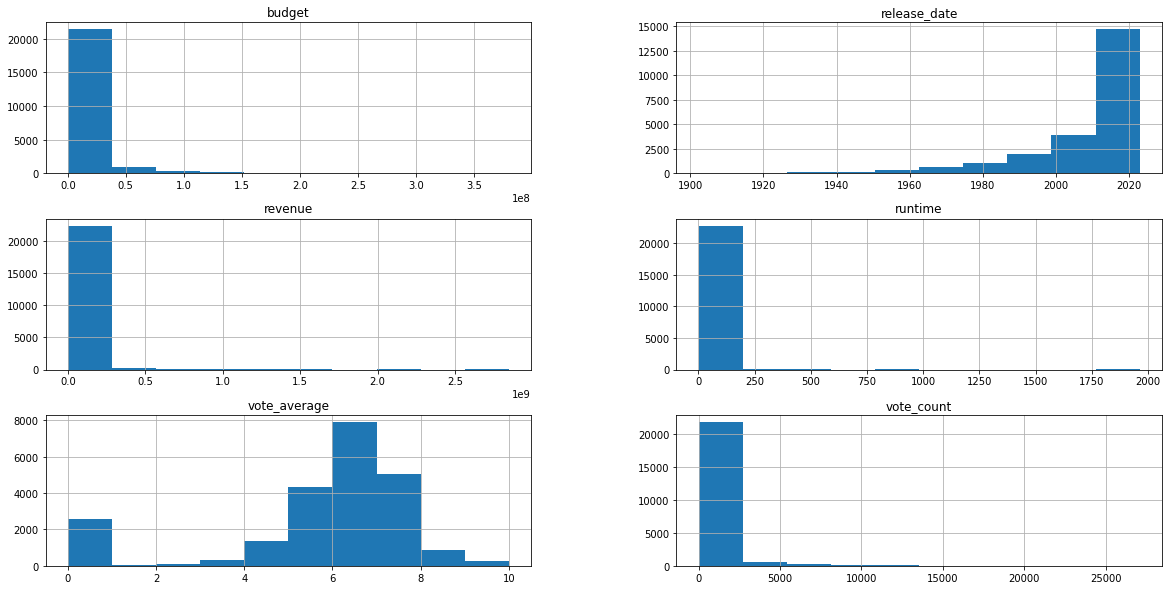

In [42]:
movies3_df.hist(figsize=(20,10))

In [60]:
# Q1. vote count가 533개 이상인 영화 중 평점이 가장 높은 영화는?
high_vote=movies3_df.sort_values(by='vote_average',ascending=False)
high_vote=high_vote[high_vote.vote_count>533]
high_vote[['id','original_title','vote_average','vote_count']].head(10)

,id,original_title,vote_average,vote_count
192,238.0,The Godfather,8.7,15086.0
36377,19404.0,दिलवाले दुल्हनिया ले जायेंगे,8.7,3241.0
230,278.0,The Shawshank Redemption,8.7,20134.0
193534,372058.0,君の名は。,8.6,8072.0
194,240.0,The Godfather: Part II,8.6,9076.0
332,424.0,Schindler's List,8.6,12041.0
608,769.0,GoodFellas,8.5,9507.0
4858,11216.0,Nuovo Cinema Paradiso,8.5,3117.0
550,680.0,Pulp Fiction,8.5,22098.0
382399,592350.0,僕のヒーローアカデミア THE MOVIE ヒーローズ：ライジング,8.5,822.0


In [69]:
# Q2. Which Movie Has The Highest Or Lowest Profit? Top 10 movies which earn highest profit?

movies3_df['profit'] = movies3_df.revenue - movies3_df.budget
high_profit=movies3_df.sort_values(by="profit", ascending=False)
high_profit[['id','original_title','profit']]



,id,original_title,profit
36678,19995.0,Avatar,2.610246e+09
129815,299534.0,Avengers: Endgame,2.441801e+09
471,597.0,Titanic,1.987464e+09
28955,140607.0,Star Wars: The Force Awakens,1.823224e+09
129817,299536.0,Avengers: Infinity War,1.746240e+09
...,...,...,...
309792,508943.0,Luca,-1.509894e+08
216273,398978.0,The Irishman,-1.510000e+08
223251,407436.0,Mowgli: Legend of the Jungle,-1.750000e+08
312660,512195.0,Red Notice,-2.000000e+08


In [64]:
# revenue이 가장 높은 영화
high_revenue=movies3_df.sort_values(by='revenue', ascending = False)
high_revenue[['id', 'original_title','revenue']].head(1)
# high_revenue[['id', 'original_title','revenue']].tail(1)

,id,original_title,revenue
36678,19995.0,Avatar,2.847246e+09


In [66]:
# budget이 가장 높은 영화
high_budget=movies3_df.sort_values(by='budget', ascending = False)
high_budget[['id', 'original_title','revenue']].head(1)

,id,original_title,revenue
1239,1865.0,Pirates of the Caribbean: On Stranger Tides,1.045714e+09


In [ ]:
# Q4. Which movie made the highest revenue and lowest as well?


In [ ]:
# Q5. Movie with shorest and longest runtime?


In [ ]:
#Q6. Which movie get the highest or lowest votes (Ratings).


In [ ]:
#Q6. Which Year Has The Highest Profit Rate?


In [ ]:
#Q7.Which length movies most liked by the audiences according to their popularity?


In [ ]:
#Q8. Average Runtime Of Movies From Year To Year?


In [ ]:
#Q9. How Does The Revenue And Popularity differs Budget And Runtime? And How Does Popularity Depends On Profit?


In [ ]:
#Q10. Which Month Released Highest Number Of Movies In All Of The Years? And Which Month Made The Highest Average Revenue?


In [ ]:
#Q11.Which Genre Has The Highest Release Of Movies?


In [ ]:
#Q12.Which genres are most popular from year to year?


In [ ]:
#Q13.Most Frequent star cast?


In [ ]:
#Q14.Top 20 Production Companies With Higher Number Of Release?


In [ ]:
#Q15.Life Time Profit Earn By Each Production Company?


In [ ]:
#Q16.Top 20 Director Who Directs Maximum Movies?


In [ ]:
#Q17.What kinds of properties are associated with movies that have high revenues?